# Inaugural Project

**Labor Supply Problem**

We consider a consumer with the following maximization problem. 

$$c^* , l^* = arg \  \underset{c,l}{max} \ log(c) - v \frac{l^{1+ \frac{1}{\epsilon}}}{1 + \frac{1}{\epsilon}}$$

$$s.t.$$

$$x = m + wl - [\tau_0 w l + \tau_1 max\{wl - \kappa , 0\}]$$

$$c \in [0,x]$$

$$l \in [0,1]$$

Where $c$ is consumption, $l$ is labor supply, $m$ is cash-on-hand, $w$ is wage rate, $\tau_0$ is the standard labor income tax, $\tau_1$ is the top bracket labor income tax, $\kappa$ is the cut-off of the labor income bracket, $x$ is total resources, $v$ scales the disutility of labor and $\epsilon$ is the Frisch elasticity of labor supply. 


Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt # baseline modul
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# Question 1

We define the functions given in the project description. For the resource constraint we use a maximize function, and for solving we use optimize by scipy. When using optimize by scipy it is only possible to minimize, which is why we minimize the negative function, so we instead maximize. 

In [2]:
# We define the functions as given in the description
# The utility function
def utility_f(c,l,v,e):
    utility = np.log(c)-v*(l**(1+(1/e))/(1+(1/e)))
    return utility

# Resource Constraint
def constraint(m,w,l,t0,t1,k):
    x = m+w*l-(t0*w*l+(t1*np.fmax(w*l-k,0)))
    return x
 
# Define and specify print solution 
def print_sol(c,l,utility):
    print(f'The optimal level of consumption is given as {c:.4f}')
    print(f'The optimal level of labour is given as {l:.4f}')
    print(f'Given the optimal level of labor and consumption we have a utility: {utility:.4f}')

# We set parameters
m = 1
v = 10
e = 0.3
t0 = 0.4
t1 = 0.1
k = 0.4
w = 0.8
   

In [3]:
# a. Objective function
def value_of_choice(l,m,w,t0,t1,k,e,v):
    c =  constraint(m,w,l,t0,t1,k)
    return -utility_f(c,l,v,e)


# b. Call the solver and set the bounds from 0 to 1 as these are the bounds set for l in the description.
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,t0,t1,k,e,v))

# c. Unpack and print the solution: 
l = sol_case1.x
c = constraint(m,w,l,t0,t1,k)
utility = utility_f(c,l,v,e)
print_sol(c,l,utility)

The optimal level of consumption is given as 1.1835
The optimal level of labour is given as 0.3823
Given the optimal level of labor and consumption we have a utility: 0.1327


# Question 2

We first construct a vector of wages between the values of 0.5 and 1.5. Then we plot the optimal labour supply and consumption as a function of wage. 

We set the population to N = 10.000 and create an empty list of labor. We then make a loop to find the labor supply that solve our maximization problem.


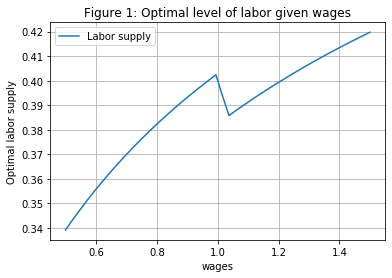

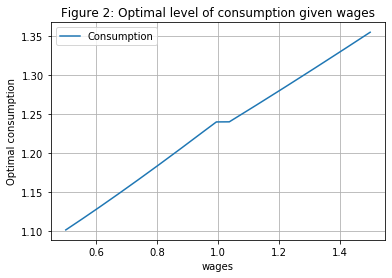

In [4]:
# We define our values and create a vector
N = 10000
w_vec = np.linspace(0.5,1.5,N)
l_values = np.zeros(N)

for i, w in enumerate(w_vec): 
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,t0,t1,k,e,v))
    l_values[i] = sol_case1.x

c_values = constraint(m,w_vec,l_values,t0,t1,k)




# We plot the level of labor given wages
plt.plot() 
plt.plot(w_vec, l_values)
plt.grid(True)
plt.xlabel("wages")
plt.ylabel("Optimal labor supply")
plt.legend(["Labor supply"])
plt.title("Figure 1: Optimal level of labor given wages")
plt.show()

# We plot the level of consumption given wages
plt.plot()
plt.plot(w_vec,c_values)
plt.grid(True)
plt.xlabel("wages")
plt.ylabel("Optimal consumption")
plt.legend(["Consumption"])
plt.title("Figure 2: Optimal level of consumption given wages")
plt.show()

In figure 1 we see that the level of labor increases as wages increase until it reaches a wage ratio around 1, where it drops. This can be seen as the consumers try to avoid paying the top-bracket labor income tax. We see that it is increasing again after the interval where it is dropping. 

We see in figure 2 that the consumption increases as the wages increase. When the wage is around 1 we see that the curve is flat. This is because the consumers tries to avoid the top bracket labor income tax. This only happens around the point where the consumers has to pay the high tax, after this interval consumption again increases as wages increase. 

# Question 3

We once again set the population to N=10.000 and define the wage as a uniform distribution. After that we make a loop to find the optimal tax, and then we take the sum of the tax, to find the total tax revenue. 

In [5]:
# We define our variables
np.random.seed(500)
N = 10000
w_vec = np.random.uniform(0.5,1.5, size=N)
l_values = np.zeros(N)
tax_i = np.zeros(N)

# We make a loop to find the optimal tax
for i, w in enumerate(w_vec):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,t0,t1,k,e,v))
    l_values[i] = sol_case1.x
    tax_i = t0*w_vec*l_values+t1*np.fmax(w_vec*l_values-k,0)
    
# Calculate total tax revenue
total_tax_rev = np.sum(tax_i)
print(f'The total tax revenue is {total_tax_rev:.4f}')

The total tax revenue is 1620.4781


# Question 4

We now do as in question 3, we just set the Frisch elasticity to $\epsilon = 0.1$.

In [14]:
 e_new = 0.1

# We rename the empty tuples such that we do not overwrite the previous
c_1_values=np.empty(N)
l_1_values=np.empty(N)
w_1_values=np.empty(N)

def u_func(c,l):
    return np.log(c) - (v * (l**(1+1/e_new))/(1+1/e_new))

def value_of_choice(l,m,v,e_new,t0,t1,k,w):
    c = m+w*l-(t0*w*l+t1*np.maximum(w*l-k,0))
    return -u_func(c,l)

for i,w in enumerate(np.linspace(0.5,1.5,10000)):

    solver = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(m,v,e_new,t0,t1,k,w))

    l = solver.x
    c = m+w*l-(t0*w*l+t1*np.maximum(w*l-k,0))

    c_1_values[i] = c
    l_1_values[i] = l
    w_1_values[i] = w
    

def tax_revenue_1(w_1_values,l_1_values,t0,t1,k):
    revenue = np.sum(t0*w_1_values*l_1_values + t1*np.maximum(w_1_values*l_1_values-k,0))
    return revenue

print(f'Sum of the tax revenue: {tax_revenue_1(w_1_values,l_1_values,t0,t1,k):.2f}')

Sum of the tax revenue: 2414.43


# Question 5

In [15]:
# 5.a. value of choice function to minize
def tax_rev_obj(x, w): 
    t0 = x[0]
    t1 = x[1]
    k = x[2]
    l_1_values = x[3]
    return -total_tax_rev

# b. constraints (violated if negative) and bounds
constraints = ({'type': 'ineq', 'fun': lambda x: c_1_values-(m+w*x[3]-(x[0]*w*x[3] + (x[1]*np.max(w*x[3]-x[2],0))))}) 
bounds = ((0,1),(0,1),(0,1),(0,1))


# c. call solver
initial_guess = [0.3,0.2,0.5,0.2]
sol_case2 = optimize.minimize(
    tax_rev_obj,initial_guess,args=(i),
    method='SLSQP',bounds=bounds,constraints=constraints)

# Print solution 
def print_solution1(t0_best,t1_best,k,l):
    print(f't0 = {t0_best:.8f}')
    print(f't1 = {t1_best:.8f}')
    print(f'k  = {k:.8f}')
    print(f'l  = {l:.8f}')

# d. unpack solution
t0_best = sol_case2.x[0]
t1_best = sol_case2.x[1]
k = sol_case2.x[2]
l = sol_case2.x[3]
print_solution1(t0_best,t1_best,k,l)

t0 = 0.33319381
t1 = 0.17745222
k  = 0.47773335
l  = 0.11635014


# Conclusion

By using Python we have solved the consumers maximization problem. 

Plotting the optimal consumption and labour given wages between 0.5 and 1.5 shows that there is a break in the labour supply curve. 

In question 3 and 4 we can conclude that when the elasticity of labour drecreases, the tax revenue increases. When the consumers do not substitute labour as much as before, the tax base increase which all things equal leads to a higher tax revenue. 